> ### Bad fit 

[ 1.33138691e-04 -1.73190094e-02  5.63719354e-01  3.74427648e+01]
           3           2
0.0001331 x - 0.01732 x + 0.5637 x + 37.44


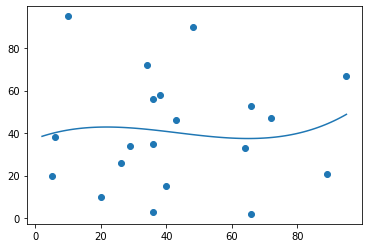

In [73]:
import numpy as np
import matplotlib.pyplot as plt
x=[89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y=[21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]
print(np.polyfit(x,y,3))
mymodel= np.poly1d(np.polyfit(x,y,3))
#polyfit coefficients dedecting
#poly1d is making a eqn
print(mymodel)
myline = np.linspace(2,95,100)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
#print(mymodel(myline))

In [74]:
# R- squared for bad fit
from sklearn.metrics import r2_score 

x=[89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y=[21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

model = np.poly1d(np.polyfit(x,y,3))
print(r2_score(y,model(x)))

0.009952707566680652


> ## Polynomial Regression

> **Data**

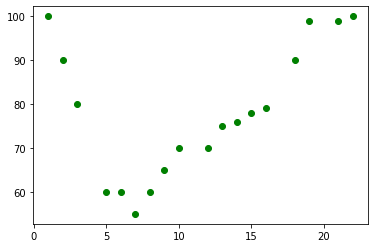

In [75]:
# Step1 : Data
import matplotlib.pyplot as plt
x=[1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y=[100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x,y, color='green')
plt.show()

> **Line Plotting and Curve Checking** 

[-3.03208795e-02  1.34333191e+00 -1.55383039e+01  1.13768037e+02]
          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8


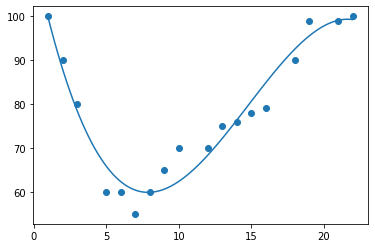

In [76]:
# Step2: Draw the line
x=[1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y=[100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
print(np.polyfit(x,y,3))
mymodel= np.poly1d(np.polyfit(x,y,3))
#polyfit coefficients dedecting
#poly1d is making a eqn
print(mymodel)
myline = np.linspace(1,22,100)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

> **Measure accuracy through R2**

In [77]:
# R- squared
from sklearn.metrics import r2_score 
x=[1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y=[100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

model = np.poly1d(np.polyfit(x,y,3))
print(r2_score(y,model(x)))

0.9432150416451026


> Checking Prediction on an unknown Value

In [78]:
# Predictions
mymodel = np.poly1d(np.polyfit(x,y,3))
print(mymodel)
speed = mymodel(18)
speed

          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8


92.48673749579999

> ### Practical Example using Sklearn

In [66]:
# Another Important Example
import pandas as pd
df= pd.read_csv("https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv")
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
#SPlit Test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

> **Linear Regression Model**

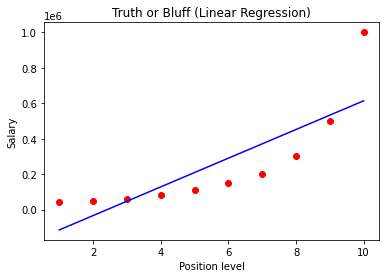

In [67]:
# Fitting linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X,y)
# Visualizing the Linear Regression result
def viz_linear():
    plt.scatter(X,y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    return
viz_linear()


> **Polynomial Regression**

In [68]:
# Fitting plynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg_degrees = PolynomialFeatures(degree=4)
X_poly =  poly_reg_degrees.fit_transform(X)
# First equation from an array
t = np.squeeze(X_poly)
print('X data after polynomial eqn is',t)
# checking equation generated from 2nd Data set
khel= np.poly1d(X_poly[1])
print(khel)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

X data after polynomial eqn is [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
   4     3     2
1 x + 2 x + 4 x + 8 x + 16


LinearRegression()

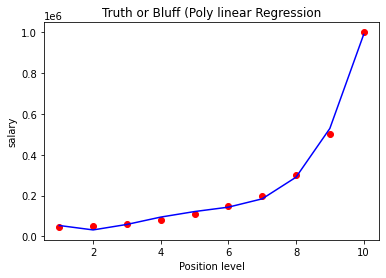

In [69]:
# Visualizzing the polynomial regression results
def viz_polynomial():
    plt.scatter(X,y, color='red')
    plt.plot(X, pol_reg.predict(X_poly),color='blue')
    plt.title('Truth or Bluff (Poly linear Regression')
    plt.xlabel('Position level')
    plt.ylabel('salary')
    return
viz_polynomial()

> ### Comparison between Linear and Polynomial Regression

> **Linear Regression Prediction**

In [70]:
pred_linear= lin_reg.predict([[11]])

In [71]:
pred_polynomial= pol_reg.predict(poly_reg_degrees.fit_transform([[11]]))

In [72]:
print("Linear Regression Result  =",pred_linear)
print("Polynomial Regression Result",pred_polynomial)

print('The difference between two regression results is ',pred_linear - pred_polynomial)

Linear Regression Result  = [694333.33333333]
Polynomial Regression Result [1780833.33333359]
The difference between two regression results is  [-1086500.00000025]


> **Polynomial k graph dekh k (like sine cosines) you have to decide kaunsa degree ka ap k points ko best fit karega**